## Bark Classification

In [162]:
## importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
import time
import copy
import os

In [126]:
## Mounting on drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
## Data path where image datas stored

data_path = "/content/drive/MyDrive/TMLC Fellowship/BarkVN-50_mendeley"

In [129]:
## checking the types of tree bark
types = os.listdir(data_path)
types

['Cananga odorata',
 'Carica papaya',
 'Barringtonia acutangula',
 'Artocarpus heterophyllus',
 'Annona squamosa',
 'Artocarpus altilis',
 'Acacia',
 'Adenanthera microsperma',
 'Adenium species',
 'Anacardium occidentale',
 'Citrus grandis',
 'Dalbergia oliveri',
 'Erythrina fusca',
 'Dipterocarpus alatus',
 'Citrus aurantiifolia',
 'Casuarina equisetifolia',
 'Cedrus',
 'Chrysophyllum cainino',
 'Delonix regia',
 'Cocos nucifera',
 'Lagerstroemia speciosa',
 'Magnolia alba',
 'Gmelina arborea Roxb',
 'Hevea brasiliensis',
 'Hopea',
 'Khaya senegalensis A.Juss',
 'Khaya senegalensis',
 'Ficus microcarpa',
 'Ficus racemosa',
 'Eucalyptus',
 'Psidium guajava',
 'Mangifera',
 'Nephelium lappaceum',
 'Melaleuca',
 'Prunnus',
 'Prunus salicina',
 'Persea',
 'Melia azedarach',
 'Polyalthia longifolia',
 'Musa',
 'Syzygium nervosum',
 'Terminalia catappa',
 'Tectona grandis',
 'Wrightia',
 'Senna siamea',
 'Pterocarpus macrocarpus',
 'Wrightia religiosa',
 'Veitchia merrilli',
 'Tamarindus i

In [130]:
#Checking for the length of targets
len(types)

50

In [131]:
# finding total count of inout images in the dataset
count = 0
for i in types:
  count += len(os.listdir(data_path+"/"+i))

In [134]:
print(f"Totally we are having {count} images in the dataset")

Totally we are having 5578 images in the dataset


In [9]:
img = plt.imread(data_path+"/"+types[1]+"/"+os.listdir(data_path+"/"+types[1])[1])
type(img)

numpy.ndarray

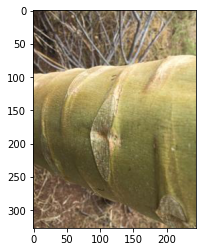

In [10]:
plt.imshow(img,cmap="gray")

In [11]:
def read_img(i):
  """i denotes differnt type of images"""
  img = plt.imread(data_path+"/"+types[i]+"/"+os.listdir(data_path+"/"+types[i])[i])
  return img

In [13]:
class TreeBarkDataset:
    def __init__(self, paths, labels, augmentations=None):
        self.paths = paths
        self.labels = labels
        
        if augmentations is None:
            self.augmentations = transforms.Compose([transforms.ToTensor()])
        else:
            self.augmentations = augmentations
        
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        
        label = self.labels[index]
        img = Image.open(self.paths[index]).convert(mode="RGB")
        img = self.augmentations(img)
            
        return (img,label)

In [14]:
#path = data_path+"/"+types[1]+"/"+os.listdir(data_path+"/"+types[1])[1]a
a = TreeBarkDataset(data_path,types[1])

In [136]:
## Generating path and labels for the images and storing in list
def generatePathsAndLabels(datapath):
  paths = []
  labels = []
  for i in os.listdir(data_path):
    for j in os.listdir(data_path+"/"+i):
      labels.append(i)
      paths.append(data_path+"/"+i+"/"+j)
  return paths,labels

In [138]:
# paths and labels of the data
paths , labels  = generatePathsAndLabels(data_path)

In [139]:
# initalizing the dataset module
obj = TreeBarkDataset(paths,labels)

In [140]:
# printing the length of dataset
len(obj)

5578

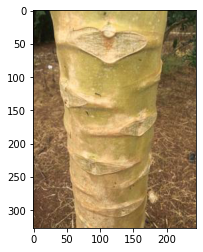

In [141]:
# printing sample image from dataset
plt.imshow(obj[122][0].permute(1,2,0))

In [145]:
## Defining function to find the count of labels
def unique_label_counts(labels):
  uniq = list(set(labels))
  temp = {}
  for i in uniq:
    temp[i] = labels.count(i)
  return temp

In [146]:
## printing unique label values
unique_label_counts(labels)

{'Syzygium nervosum': 109,
 'Gmelina arborea Roxb': 103,
 'Lagerstroemia speciosa': 96,
 'Adenanthera microsperma': 80,
 'Veitchia merrilli': 152,
 'Barringtonia acutangula': 102,
 'Magnolia alba': 92,
 'Terminalia catappa': 113,
 'Ficus microcarpa': 150,
 'Citrus grandis': 84,
 'Acacia': 102,
 'Prunnus': 80,
 'Tectona grandis': 102,
 'Hopea': 91,
 'Khaya senegalensis A.Juss': 99,
 'Artocarpus altilis': 104,
 'Citrus aurantiifolia': 108,
 'Cedrus': 93,
 'Pterocarpus macrocarpus': 100,
 'Tamarindus indica': 103,
 'Hevea brasiliensis': 110,
 'Persea': 103,
 'Khaya senegalensis': 95,
 'Psidium guajava': 122,
 'Prunus salicina': 105,
 'Polyalthia longifolia': 100,
 'Cocos nucifera': 110,
 'Nephelium lappaceum': 104,
 'Dalbergia oliveri': 89,
 'Musa': 132,
 'Cananga odorata': 101,
 'Chrysophyllum cainino': 111,
 'Mangifera': 92,
 'Delonix regia': 103,
 'Casuarina equisetifolia': 97,
 'Ficus racemosa': 117,
 'Melia azedarach': 103,
 'Melaleuca': 107,
 'Adenium species': 144,
 'Wrightia': 97,

In [25]:
#base_path ="/content/drive/MyDrive/TMLC Fellowship"
#os.mkdir(base_path+"/"+"data")

In [147]:
## path for storing train and test data
path = "/content/drive/MyDrive/TMLC Fellowship/data"

In [148]:
## creating training and testing path

#os.mkdir(path+"/"+"training")
train_path = path+"/"+"training"
#os.mkdir(path+"/"+"testing")
test_path = path+"/"+"testing"

In [28]:
## Making train and test data into folders
from numpy.ma.core import floor
for i in os.listdir(data_path):
  os.makedirs(train_path+"/"+i,exist_ok=True)
  os.makedirs(test_path+"/"+i,exist_ok=True)
  val = len(os.listdir(data_path+"/"+i))
  count = 0
  for j in os.listdir(data_path+"/"+i):
    
    img = Image.open(data_path+"/"+i+"/"+j).convert(mode="RGB")
    if count < floor(val*0.7):
      img.save(train_path+"/"+i+"/"+j)
    else:
      img.save(test_path+"/"+i+"/"+j)
    count = count + 1



'from numpy.ma.core import floor\nfor i in os.listdir(data_path):\n  os.makedirs(train_path+"/"+i,exist_ok=True)\n  os.makedirs(test_path+"/"+i,exist_ok=True)\n  val = len(os.listdir(data_path+"/"+i))\n  count = 0\n  for j in os.listdir(data_path+"/"+i):\n    \n    img = Image.open(data_path+"/"+i+"/"+j).convert(mode="RGB")\n    if count < floor(val*0.7):\n      img.save(train_path+"/"+i+"/"+j)\n    else:\n      img.save(test_path+"/"+i+"/"+j)\n    count = count + 1'

In [293]:
## defining transforms to apply on input images
train_tranforms = transforms.Compose([
                                      
                                      transforms.Resize((224,224)),
                                          transforms.RandomHorizontalFlip(0.2),
                                          transforms.RandomVerticalFlip(0.1),
                                          transforms.RandomAutocontrast(0.2),
                                          transforms.RandomAdjustSharpness(0.3),
                                          transforms.ToTensor()
                                      ])

test_tranforms = transforms.Compose([
                                      transforms.Resize((224,224)),
                                          transforms.RandomHorizontalFlip(0.2),
                                          transforms.RandomVerticalFlip(0.1),
                                          transforms.RandomAutocontrast(0.2),
                                          transforms.RandomAdjustSharpness(0.3),
                                          transforms.ToTensor()
                                         

])

In [150]:
## loading dataset with the torch library
train_data = datasets.ImageFolder(root=train_path, transform=train_tranforms)
test_data = datasets.ImageFolder(root=test_path, transform=test_tranforms)

In [152]:
## printing train data summary
train_data

Dataset ImageFolder
    Number of datapoints: 3884
    Root location: /content/drive/MyDrive/TMLC Fellowship/data/training
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.2)
               RandomVerticalFlip(p=0.1)
               RandomAutocontrast(p=0.2)
               RandomAdjustSharpness(sharpness_factor=0.3,p=0.5)
               ToTensor()
           )

In [153]:
## printing test data summary
test_data

Dataset ImageFolder
    Number of datapoints: 1694
    Root location: /content/drive/MyDrive/TMLC Fellowship/data/testing
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.2)
               RandomVerticalFlip(p=0.1)
               RandomAutocontrast(p=0.2)
               RandomAdjustSharpness(sharpness_factor=0.3,p=0.5)
               ToTensor()
           )

In [154]:
## Classes on the dataset
class_to_idx = train_data.class_to_idx
class_to_idx

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [155]:
## Converting idx to class
idx_to_class = {class_to_idx[i]:i for i in class_to_idx}
idx_to_class

{0: 'Acacia',
 1: 'Adenanthera microsperma',
 2: 'Adenium species',
 3: 'Anacardium occidentale',
 4: 'Annona squamosa',
 5: 'Artocarpus altilis',
 6: 'Artocarpus heterophyllus',
 7: 'Barringtonia acutangula',
 8: 'Cananga odorata',
 9: 'Carica papaya',
 10: 'Casuarina equisetifolia',
 11: 'Cedrus',
 12: 'Chrysophyllum cainino',
 13: 'Citrus aurantiifolia',
 14: 'Citrus grandis',
 15: 'Cocos nucifera',
 16: 'Dalbergia oliveri',
 17: 'Delonix regia',
 18: 'Dipterocarpus alatus',
 19: 'Erythrina fusca',
 20: 'Eucalyptus',
 21: 'Ficus microcarpa',
 22: 'Ficus racemosa',
 23: 'Gmelina arborea Roxb',
 24: 'Hevea brasiliensis',
 25: 'Hopea',
 26: 'Khaya senegalensis',
 27: 'Khaya senegalensis A.Juss',
 28: 'Lagerstroemia speciosa',
 29: 'Magnolia alba',
 30: 'Mangifera',
 31: 'Melaleuca',
 32: 'Melia azedarach',
 33: 'Musa',
 34: 'Nephelium lappaceum',
 35: 'Persea',
 36: 'Polyalthia longifolia',
 37: 'Prunnus',
 38: 'Prunus salicina',
 39: 'Psidium guajava',
 40: 'Pterocarpus macrocarpus',


In [156]:
## using data loader to load the train and test data
train_data_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=16)
test_data_loader = torch.utils.data.DataLoader(test_data, shuffle=False, batch_size=16)

In [157]:
# displaying train data loader
train_data_loader

In [158]:
# displaying test data loader
test_data_loader

In [160]:
## defining the config module
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = "TreeBarkClassification"
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (512,512)
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

config = Config()

this notebook is using device: cuda


In [176]:
# importing resnet model from pytorch
from torchvision.models import resnet18,ResNet18_Weights

In [197]:
# loading with pretrained weights
weights = ResNet18_Weights.DEFAULT
net = resnet18(weights=weights)

In [ ]:
## Selecting loss function and optimizer (choosing Adam as that is best of all optimizers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
## Defining a function to calculate the accuracy
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [209]:
## Adding final linear layer to the model
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 50)
# setting the model to cuda
net.to(config.DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [210]:
## defining code for training of the model.
n_epochs = 5 # setting the epoch to 5 as this is loaded with pretrained weights
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_data_loader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(train_data_loader):
        data_, target_ = data_.to(config.DEVICE), target_.to(config.DEVICE)
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (test_data_loader):
            data_t, target_t = data_t.to(config.DEVICE), target_t.to(config.DEVICE)
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(test_data_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

        
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(net.state_dict(), 'resnet.pt')
            print('save-model')
    net.train()

Epoch 1

Epoch [1/5], Step [0/243], Loss: 4.1068
Epoch [1/5], Step [20/243], Loss: 3.8320
Epoch [1/5], Step [40/243], Loss: 3.5588
Epoch [1/5], Step [60/243], Loss: 3.6767
Epoch [1/5], Step [80/243], Loss: 2.4131
Epoch [1/5], Step [100/243], Loss: 1.5398
Epoch [1/5], Step [120/243], Loss: 2.0994
Epoch [1/5], Step [140/243], Loss: 1.4491
Epoch [1/5], Step [160/243], Loss: 1.7336
Epoch [1/5], Step [180/243], Loss: 1.1922
Epoch [1/5], Step [200/243], Loss: 1.3009
Epoch [1/5], Step [220/243], Loss: 0.9202
Epoch [1/5], Step [240/243], Loss: 1.0002

train-loss: 2.1531, train-acc: 44.2585
validation loss: 1.1995, validation acc: 66.5880

Improvement-Detected, save-model
Epoch 2

Epoch [2/5], Step [0/243], Loss: 3.0025
Epoch [2/5], Step [20/243], Loss: 2.2976
Epoch [2/5], Step [40/243], Loss: 1.6249
Epoch [2/5], Step [60/243], Loss: 0.9577
Epoch [2/5], Step [80/243], Loss: 1.5871
Epoch [2/5], Step [100/243], Loss: 1.1661
Epoch [2/5], Step [120/243], Loss: 0.5233
Epoch [2/5], Step [140/243], Lo

In [223]:
## saving the model weights
# Specify a path
PATH = "state_dict_model.pt"

# Save
torch.save(net.state_dict(), PATH)

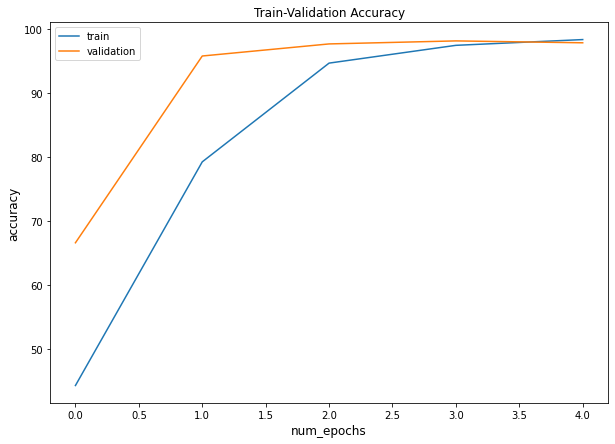

In [286]:
fig = plt.figure(figsize=(10,7))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.savefig("model_performance.png")

In [278]:
model = net
model.load_state_dict(torch.load(PATH))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [281]:
inputs, classes = next(iter(test_data_loader))
 
model = model.to(config.DEVICE)
inputs=inputs.to(config.DEVICE)
print(inputs.size())
outputs=model(inputs)
_, preds = torch.max(outputs, 1)
preds=preds.cpu().numpy()
classes=classes.numpy()
print(preds)
print(classes)

torch.Size([16, 3, 224, 224])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


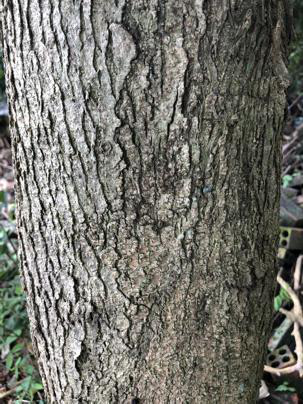

In [296]:
img=Image.open("/content/drive/MyDrive/TMLC Fellowship/data/testing/Wrightia/IMG_3686.JPG")
img

In [326]:
## Function to predict single images
def predict_single_image(image_path,transforms):
  img=Image.open(image_path)
  imgs=transforms(img)
  im = imgs.unsqueeze(0)
  val = torch.argmax(model(im.to("cuda"))).to("cpu").numpy()
  print(f"The input tree bark image belongs to class {image_path}")
  print(f"The model output refers to {idx_to_class[int(val)]}")

In [327]:
img_path ="/content/drive/MyDrive/TMLC Fellowship/data/testing/Wrightia/IMG_3686.JPG"
predict_single_image(img_path,test_tranforms)

The input tree bark image belongs to class /content/drive/MyDrive/TMLC Fellowship/data/testing/Wrightia/IMG_3686.JPG
The model output refers to Wrightia


In [328]:
img_path="/content/drive/MyDrive/TMLC Fellowship/data/testing/Wrightia religiosa/IMG_2290.JPG"
predict_single_image(img_path,test_tranforms)

The input tree bark image belongs to class /content/drive/MyDrive/TMLC Fellowship/data/testing/Wrightia religiosa/IMG_2290.JPG
The model output refers to Wrightia religiosa


I will be attaching model,weights and graphs file to the submission file

## Conclusion

In this Tree Bark Classification problem I have used Resnet18 model to achieve performance and good inference rate. I have taken pretrained model from the torch library and made transfer learning which helps me to burn little resource.

Here we have achieved a training accuracy of about 98.37% and validation accuracy of about 97.87%. The performance of the model looks good.

train-acc: 98.3780  -  train-loss: 0.7685,  

validation acc: 97.8749 - validation loss: 0.3421, 

I will be submitting this assignment with the above experiments to TMLC

Regards,

karthik,

8807748731,

karthiksri2424@gmail.com